<a href="https://colab.research.google.com/github/achillesposiedon/Medium/blob/master/BaselineApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

In [4]:
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

KeyboardInterrupt: ignored

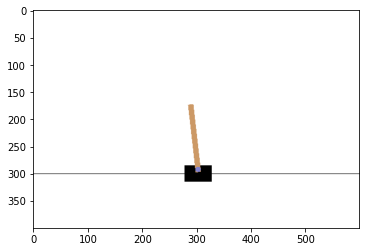

In [5]:

env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [6]:
!sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-

In [7]:
!pip install stable-baselines[mpi]

In [8]:
!pip install stable-baselines[mpi]==2.8.0
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x

  Using cached https://files.pythonhosted.org/packages/da/75/6f92ac720de62be8c16ec652d22c9296a90d857cd636d043de16de8128ab/stable_baselines-2.8.0-py3-none-any.whl
  Found existing installation: stable-baselines 2.9.0
    Uninstalling stable-baselines-2.9.0:
      Successfully uninstalled stable-baselines-2.9.0
TensorFlow 1.x selected.


In [9]:
!pip install stable-baselines==2.9.0


  Using cached https://files.pythonhosted.org/packages/c0/05/f6651855083020c0363acf483450c23e38d96f5c18bec8bded113d528da5/stable_baselines-2.9.0-py3-none-any.whl
  Found existing installation: stable-baselines 2.8.0
    Uninstalling stable-baselines-2.8.0:
      Successfully uninstalled stable-baselines-2.8.0


In [10]:
from stable_baselines.common.cmd_util import make_atari_env
from stable_baselines.common.policies import CnnPolicy
from stable_baselines.common.vec_env import VecFrameStack
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [11]:
# There already exists an environment generator that will make and wrap atari environments correctly.
# We use 16 parallel processes
env = make_atari_env('BreakoutNoFrameskip-v4', num_env=16, seed=0)
# Stack 4 frames
env = VecFrameStack(env, n_stack=4)

In [0]:
model = A2C(CnnPolicy, env, lr_schedule='constant', verbose=1)
model.learn(total_timesteps=int(5e6))











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -7.51    |
| fps                | 99       |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| total_timesteps    | 80       |
| value_loss         | 0.00407  |
---------------------------------
---------------------------------
| ep_len_mean        | 170      |
| ep_reward_mean     | 1.02     |
| explained_variance | 0.0158   |
| fps                | 229      |
| nupdates           | 100      |
| policy_entropy     | 1.39     |
| total_timesteps    | 8000     |
| value_loss         | 0.0713   |
---------------------------------
---------------------------------
| ep_len_mean        | 175      |
| ep_reward_mean     | 1.17     |
| explained_variance | -0.0622  |
| fps                | 231 